# 441B Assignment #3

## Pregya Vijayakumar

In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv ("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:, :]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
y = y.fillna(0.).sort_index()

In [7]:
# Assumption Nulls are zeros, need to investigate; data is bad
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [8]:
from pytrends.request import TrendReq

In [9]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "iPad", "MacBook", "Apple Layoffs", "Apple CEO", "Apple Share Price", "Recession", "Chip Costs", "Apple TV +", "Airpods", "Apple Ecosystem", "M2", "Apple Music", "Airtag", "Real Madrid", "Dua Lipa Tickets", "Pokémon"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [10]:
X = df.resample("Q").mean()

In [11]:
# Align the Data
temp = pd.concat([y, X], axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:, 1:].copy()

# 3.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [15]:
from sklearn.linear_model import Lasso

In [16]:
lasso = Lasso(alpha = .1)
# We use the Lambda .1 as .5 presents a blank plot

In [17]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [18]:
coefficients = lasso.coef_

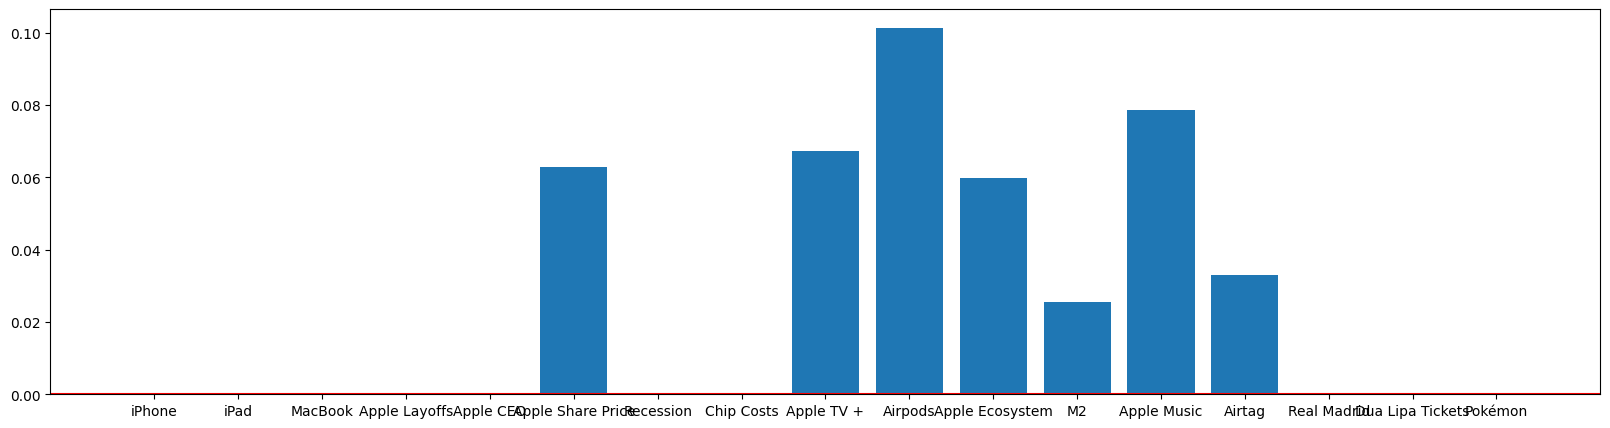

In [19]:
# Plot the Lasso chart
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

#### The keywords we selected are as follows - iPhone, iPad, MacBook, Apple Layoffs, Apple CEO, Apple Share Price, Recession, Chip Costs, Apple TV+ , Airpods, Apple Ecosystem, M2, Apple Music, Airtag, Real Madrid,  Dua Lipa Tickets and Pokémon. 

#### From the given keywords, we predicted that iPhone, iPad, MacBook, Apple Layoffs, Apple CEO, Apple Share Price, Recession, Chip Costs, Apple TV+ , Airpods, Apple Ecosystem, M2, Apple Music, Airtag, would Nowcast Earnings. While Real Madrid,  Dua Lipa Tickets and Pokémon would not. 

#### From this Graph we can see that the three keywords we predicted would not nowcast earnings do not. While, it is shocking to see how high up and important the variables Airpods, Apple Music, Apple TV+ are, in that order. Given Apple TV+ produced the highest ever quarterly earnings, it is quite evident as to how the magnitude might be high. Similarly, Apple Music also produced a growth in earnings the previous quarter. 

#### It is surprising to see that iPhone, iPad, and MacBook have such a low level of contribution to the Nowcasted Earnings. When we do conduct the same analysis without Apple TV+ and Apple Music, the iPhone then presents a higher coefficient. This might be due to the fact that lately the sales of iPhones have been falling and comparing them to Apple TV+ and Apple Music which have been faring well, it might reduce its importance as compared to the two variables. 

#### Apart from that, the other relevant variables for Nowcasted Earnings are Apple Share Price, Airpods, Apple Ecosystem, M2 and Airtag. As Apple is looking forward to releasing the next generation of Airpods in the near future, it seems that this is the reason for such a high coefficient. 

#### iPad, iPhone and Macbook being so low does not make sense, but they might be overpowered by the others due to their recent success. Since such a big emphasis is given to the "Apple Ecosystem" by the users and the M2 chip was a huge success, it is only obvious that these keywords play a big role in nowcasting Apple's earnings.

#### The zero coefficients for the keywords Apple Layoffs, Apple CEO, Recession and Chip Costs do not have an impact on Apple's Earnings. 

#### Hence, we can say that the magnitude of the coefficients do make sense keeping in mind the recent trends and talk of the market regarding Apple and its products. 